# STATS 302 Midterm Project
## Luka Mdivani, Pierre Nanquette, Teodora Petkova

We are working on the wine quality dataset found on the following link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009<br>

In our work we are doing explaratory analysis, which shows that... ELABORATE HERE.<br>


Then, we preprocessed the data in the following way .... ELABORATE HERE <br>


Finally, we solved two problems: 

1. A regression problem which tried to figure out the quality of the wine as a continuous variable based on the features at hand. <br>
2. A binary classification problem which defined wine with quality above the 25th percentile as high quality wine, and below the 25th percentile as low quality wine. Then, based on the data, we try to predict if wine is high quality or low quality.


Our analysis shows that .... ELABORATE HERE.

## Part 0: Python and Data Imports

In [101]:
#All imports used in the notebook are in this cell:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [171]:
# Data Import:
df = pd.read_csv("winequality-red.csv")
y = df['quality']
df.drop('quality', axis='columns', inplace=True)
df['constant'] = [1]*1599
df.drop(['citric acid', 'chlorides', 'fixed acidity'], axis='columns', inplace=True)


## Part 1: Exploratory Analysis

In [172]:
df.describe()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,constant
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,0.527821,2.538806,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.0
std,0.179060,1.409928,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.0
min,0.120000,0.900000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.0
25%,0.390000,1.900000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.0
50%,0.520000,2.200000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.0
75%,0.640000,2.600000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.0
max,1.580000,15.500000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.0


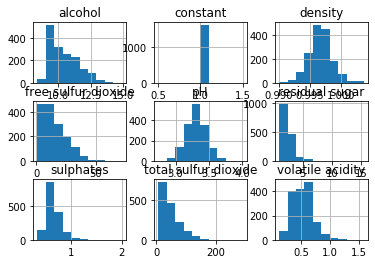

In [173]:
df.hist();

[Text(0, 0, 'volatile acidity'),
 Text(0, 0, 'residual sugar'),
 Text(0, 0, 'free sulfur dioxide'),
 Text(0, 0, 'total sulfur dioxide'),
 Text(0, 0, 'density'),
 Text(0, 0, 'pH'),
 Text(0, 0, 'sulphates'),
 Text(0, 0, 'alcohol'),
 Text(0, 0, 'constant')]

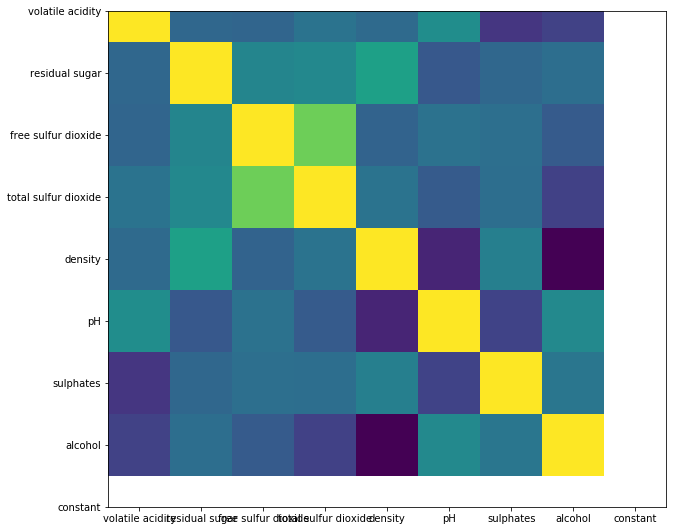

In [174]:
correlation_matrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10 ,10)
ax.imshow(correlation_matrix)
features = df.columns;
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)



There are a few highly correlated variables, like pH and fixed acidity, citric acid and volatile acidity, citric acid and pH. We might consider generating an extra variable which accounts for their correlation.

In [175]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df, y, random_state =0)

Text(0, 0.5, 'cumulative explained variance')

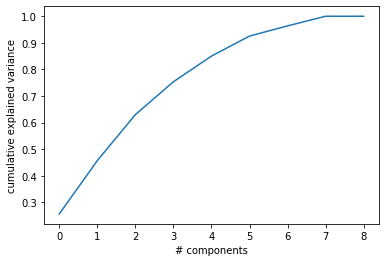

In [176]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])
pca = pipeline.fit_transform(Xtrain) 
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

The cumulative explained variance shows that we might as well use all 10 available dimensions.

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = df.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(12):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of volatile acidity: 1.2021252501411348
VIF of residual sugar: 1.3613599419824793
VIF of free sulfur dioxide: 1.9041776920691684
VIF of total sulfur dioxide: 1.9773918819884768
VIF of density: 1.90079649604258
VIF of pH: 1.2767091768478436
VIF of sulphates: 1.1666465157323518
VIF of alcohol: 1.6881876997338292
VIF of constant: 546354.1832644132


IndexError: index 9 is out of bounds for axis 0 with size 9

In [141]:
df1 = df.drop('density', axis='columns')
data = df1.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(11):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of fixed acidity: 2.9754911529611663
VIF of volatile acidity: 1.7598792477622955
VIF of citric acid: 3.127790937194912
VIF of residual sugar: 1.0994328341913613
VIF of chlorides: 1.4688926964199256
VIF of free sulfur dioxide: 1.9486906215575914
VIF of total sulfur dioxide: 2.1732399372507225
VIF of density: 2.2394117246851617
VIF of pH: 1.3415238909219986
VIF of sulphates: 1.2996028557363482
VIF of alcohol: 1429.2008467620733


In [178]:
# linear regression - use to compare other models

res = sm.OLS(y,df, axis='columns').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.82e-142
Time:                        20:36:03   Log-Likelihood:                -1583.2
No. Observations:                1599   AIC:                             3184.
Df Residuals:                    1590   BIC:                             3233.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.1067 

## Part 2: Data Preprocessing

## Part 3: Models

In [179]:
regression = LinearRegression().fit(Xtrain, ytrain)
print(regression.score(Xtest, ytest))

0.3324238618164419


In [181]:
RandomForest = RandomForestRegressor(n_estimators=1000).fit(Xtrain, ytrain)
print(RandomForest.score(Xtest,ytest))

0.4228503359204835


In [183]:
df['interaction_term_ph_density'] = -df['pH']*df['density']
#df['interaction_term_c_acid_v_acid'] = df['citric acid']*df['volatile acidity']
Xtrain,Xtest,ytrain,ytest = train_test_split(df, y, random_state =0)

In [184]:
regression = LinearRegression().fit(Xtrain, ytrain)
print(regression.score(Xtest, ytest))

0.33452052739258886


In [185]:
RandomForest = RandomForestRegressor(n_estimators=500).fit(Xtrain, ytrain)
print(RandomForest.score(Xtest,ytest))

0.4280755161517932


Baseline accuracy achieved when the data was not preprocessed at all:<br> 
Linear Regression: 0.34542438124562846<br>
Random Forest: 0.4326893067869231<br>

The accuracy of the models did not change much when the interaction terms above were added. This might be because.... <br>

When we tried removing thw following columns from the data: 'citric acid', 'chlorides', 'fixed acidity', the accuracy did not change much, it even declined a little bit. We remove them, because they were highly correlated with the other variables and by removing them we lowered the VIF of all other variables to values in $[0, 3]$. <br>
Linear Regression: 0.33452052739258886<br>
Random Forest: 0.4280755161517932 <br>

### Binary Classification Problem
The range of the quality of the wine is $(3, 8)$. Wine with quality below $5.0$ is considered bad quality wine. We devised a binary classification model which will classify the wine as good and bad quality.

In [131]:
# wine with quality below 5.0 is bad quality wine
classification_y = np.zeros(len(y))
for i in range(len(y)):
    classification_y[i] = y[i]>=5.0
    
# New train-test splitting:
Xtrain,Xtest,ytrain,ytest = train_test_split(df, classification_y, random_state =0)


In [132]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
print(model.score(Xtest, ytest))

0.96


C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
print(model.score(Xtest, ytest))

0.9525


C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Baseline accuracy achieved when the data was not preprocessed at all:<br> 
Logistic Regression: 0.96<br>
Random Forest: 0.9525<br>
